## Model Selection using RFE

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [10]:

# Importing bikes data 

bikes =  pd.read_csv("./day.csv")

# Looking at the first five rows

bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes.shape


(730, 16)

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [13]:
bikes.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Drop the irrelevant columns 

In [14]:
bikes.drop(['casual','registered','dteday'], axis = 1, inplace = True)

In [15]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [16]:
bikes.shape

(730, 13)

### EDA on Dataset 

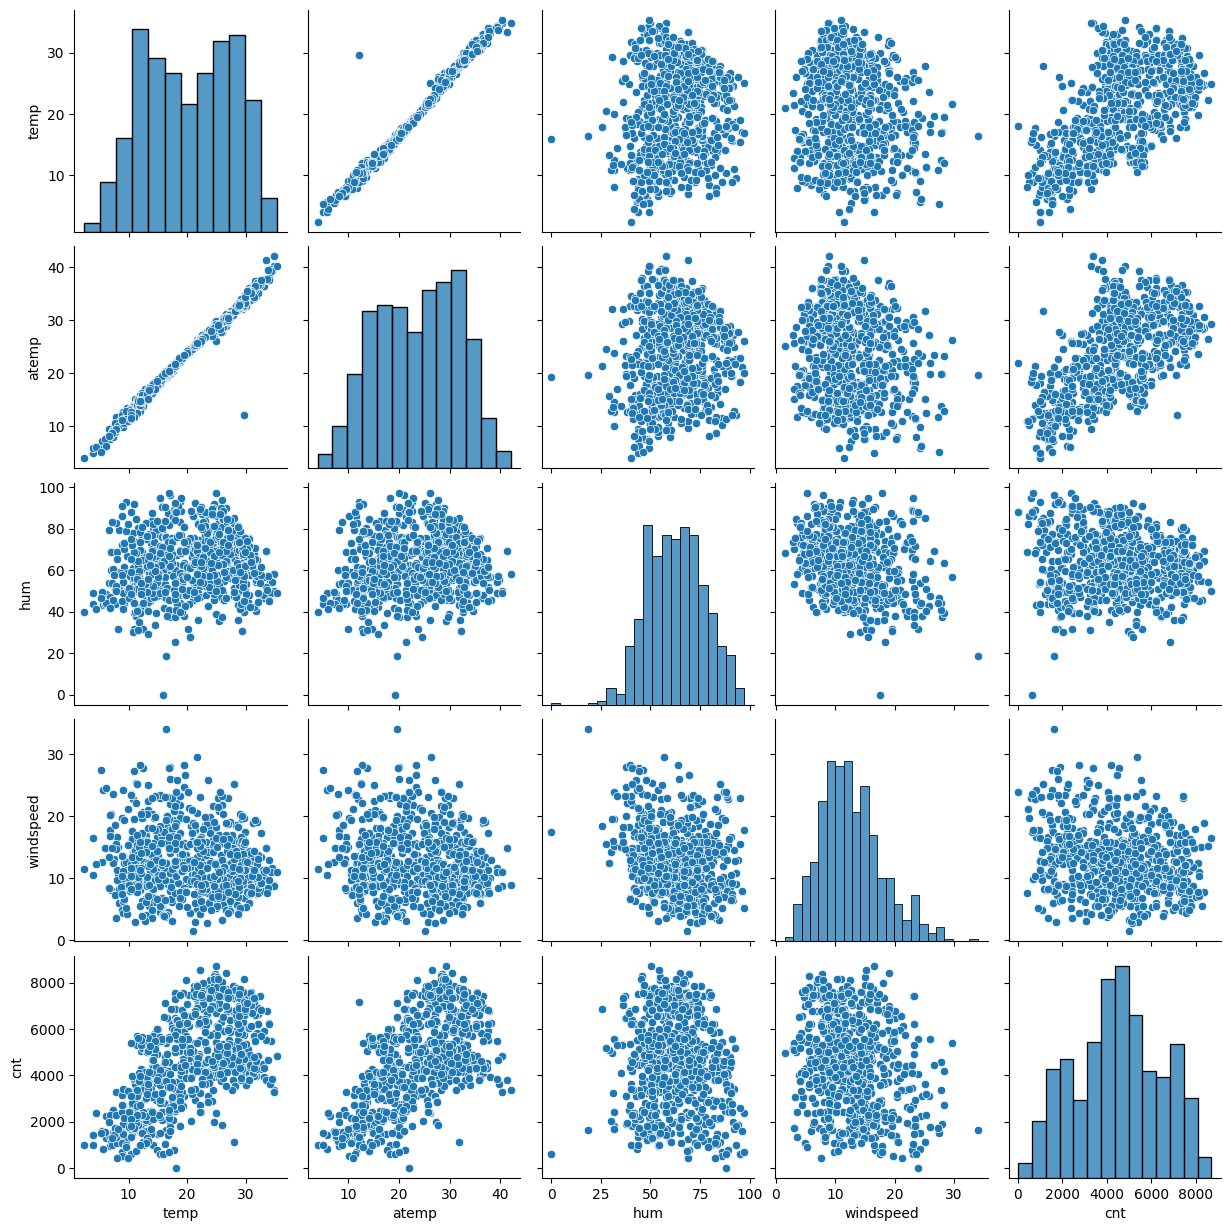

In [18]:
numeric_col = ["temp","atemp","hum","windspeed","cnt"]

bikes_num = bikes[numeric_col]

sns.pairplot(bikes_num)
plt.show()

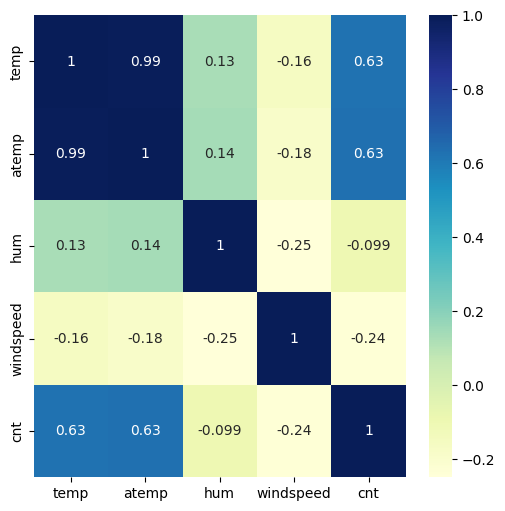

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (6, ))
sns.heatmap(bikes_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

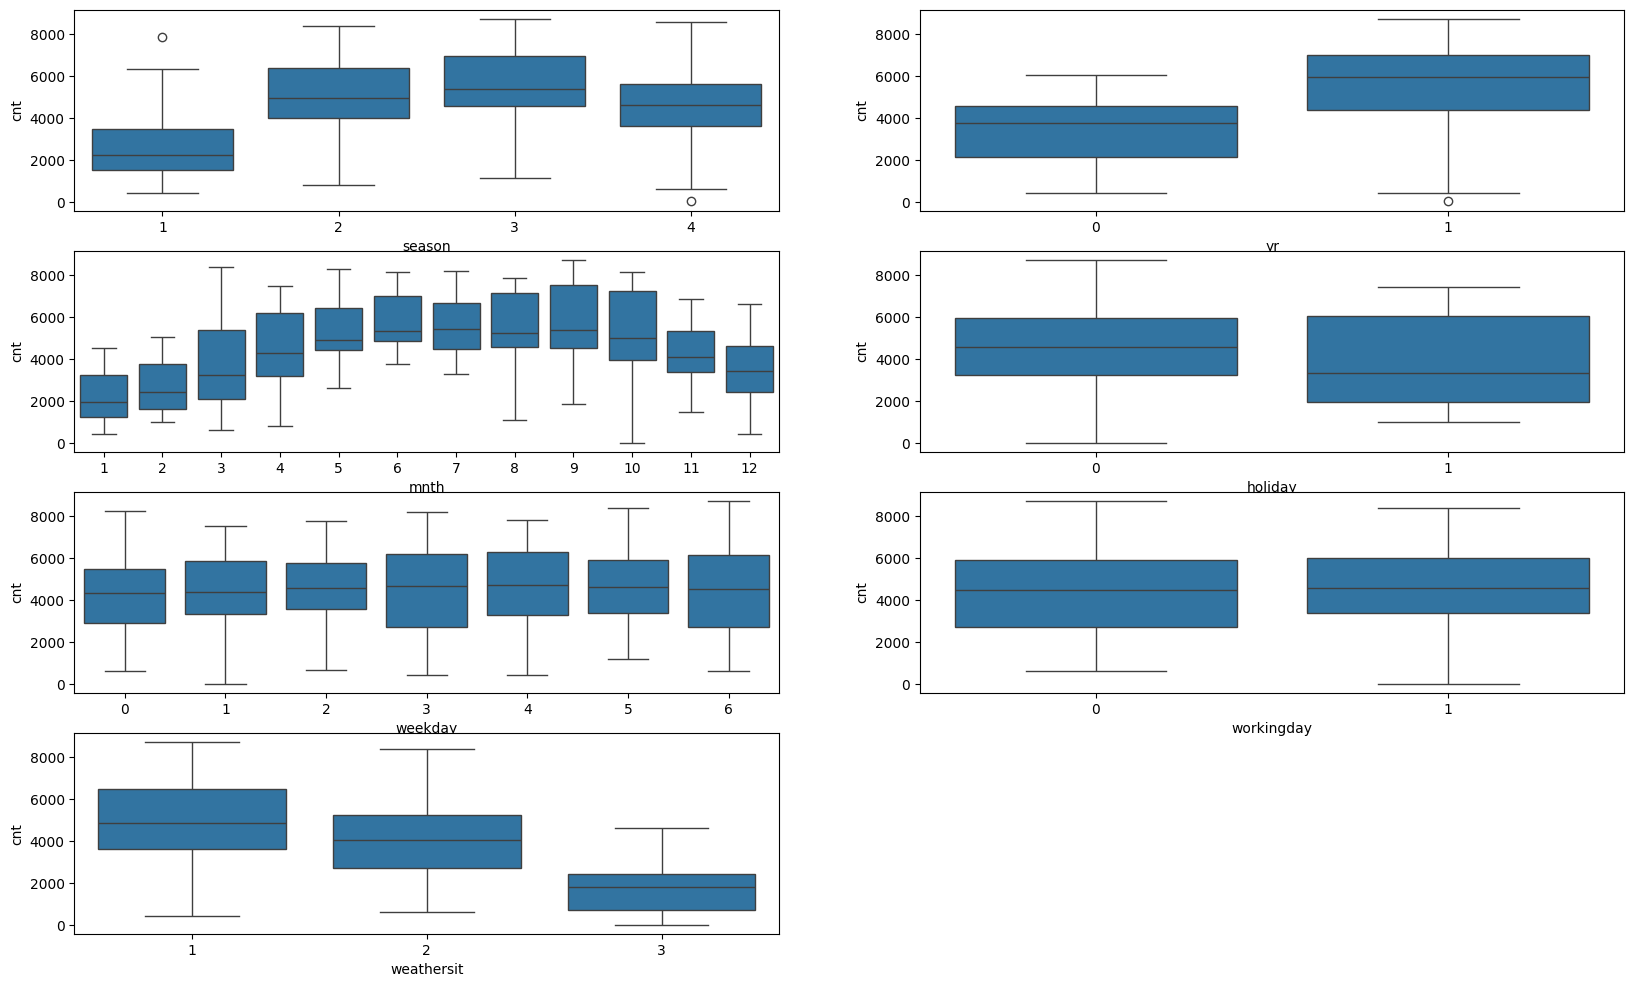

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

In [23]:
bikes['season'] = bikes['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}) 

bikes['weathersit'] = bikes['weathersit'].map({1:"clear", 2:"mist", 3:"snow", 4:"heavyrain"})

bikes['yr'] = bikes['yr'].map({0:"2018",1:"2019"})

bikes['mnth'] = bikes['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",
                                 9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

bikes['weekday'] = bikes['weekday'].map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})



In [24]:
bikes.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Let's drop the first column from status df using 'drop_first = True'

season = pd.get_dummies(bikes['season'],dtype=int,drop_first = True)



In [26]:
bikes = pd.concat([bikes, season], axis = 1)


In [27]:
bikes.drop(['season'],axis=1,inplace=True)

In [28]:
weather = pd.get_dummies(bikes['weathersit'],drop_first=True,dtype=int)
bikes = pd.concat([bikes, weather], axis = 1)

bikes.drop(['weathersit'],axis=1,inplace=True)

In [29]:
bikes.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist,snow
0,1,2018,Jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,2,2018,Jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,3,2018,Jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,2018,Jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,2018,Jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Dummy Variables

In [30]:
year = pd.get_dummies(bikes['yr'],drop_first=True,dtype=int)
bikes = pd.concat([bikes, year], axis = 1)

bikes.drop(['yr'],axis=1,inplace=True)

In [31]:
month = pd.get_dummies(bikes['mnth'],drop_first=True,dtype=int)
bikes = pd.concat([bikes, month], axis = 1)

bikes.drop(['mnth'],axis=1,inplace=True)

In [32]:
weekday = pd.get_dummies(bikes['weekday'],drop_first=True,dtype=int)

bikes = pd.concat([bikes,weekday],axis=1)

bikes.drop(['weekday'],axis=1,inplace=True)

In [33]:
bikes.head()

,instant,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
bikes.drop(['instant'],axis=1,inplace=True)

## Splitting the Data into Training and Testing Sets

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [38]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


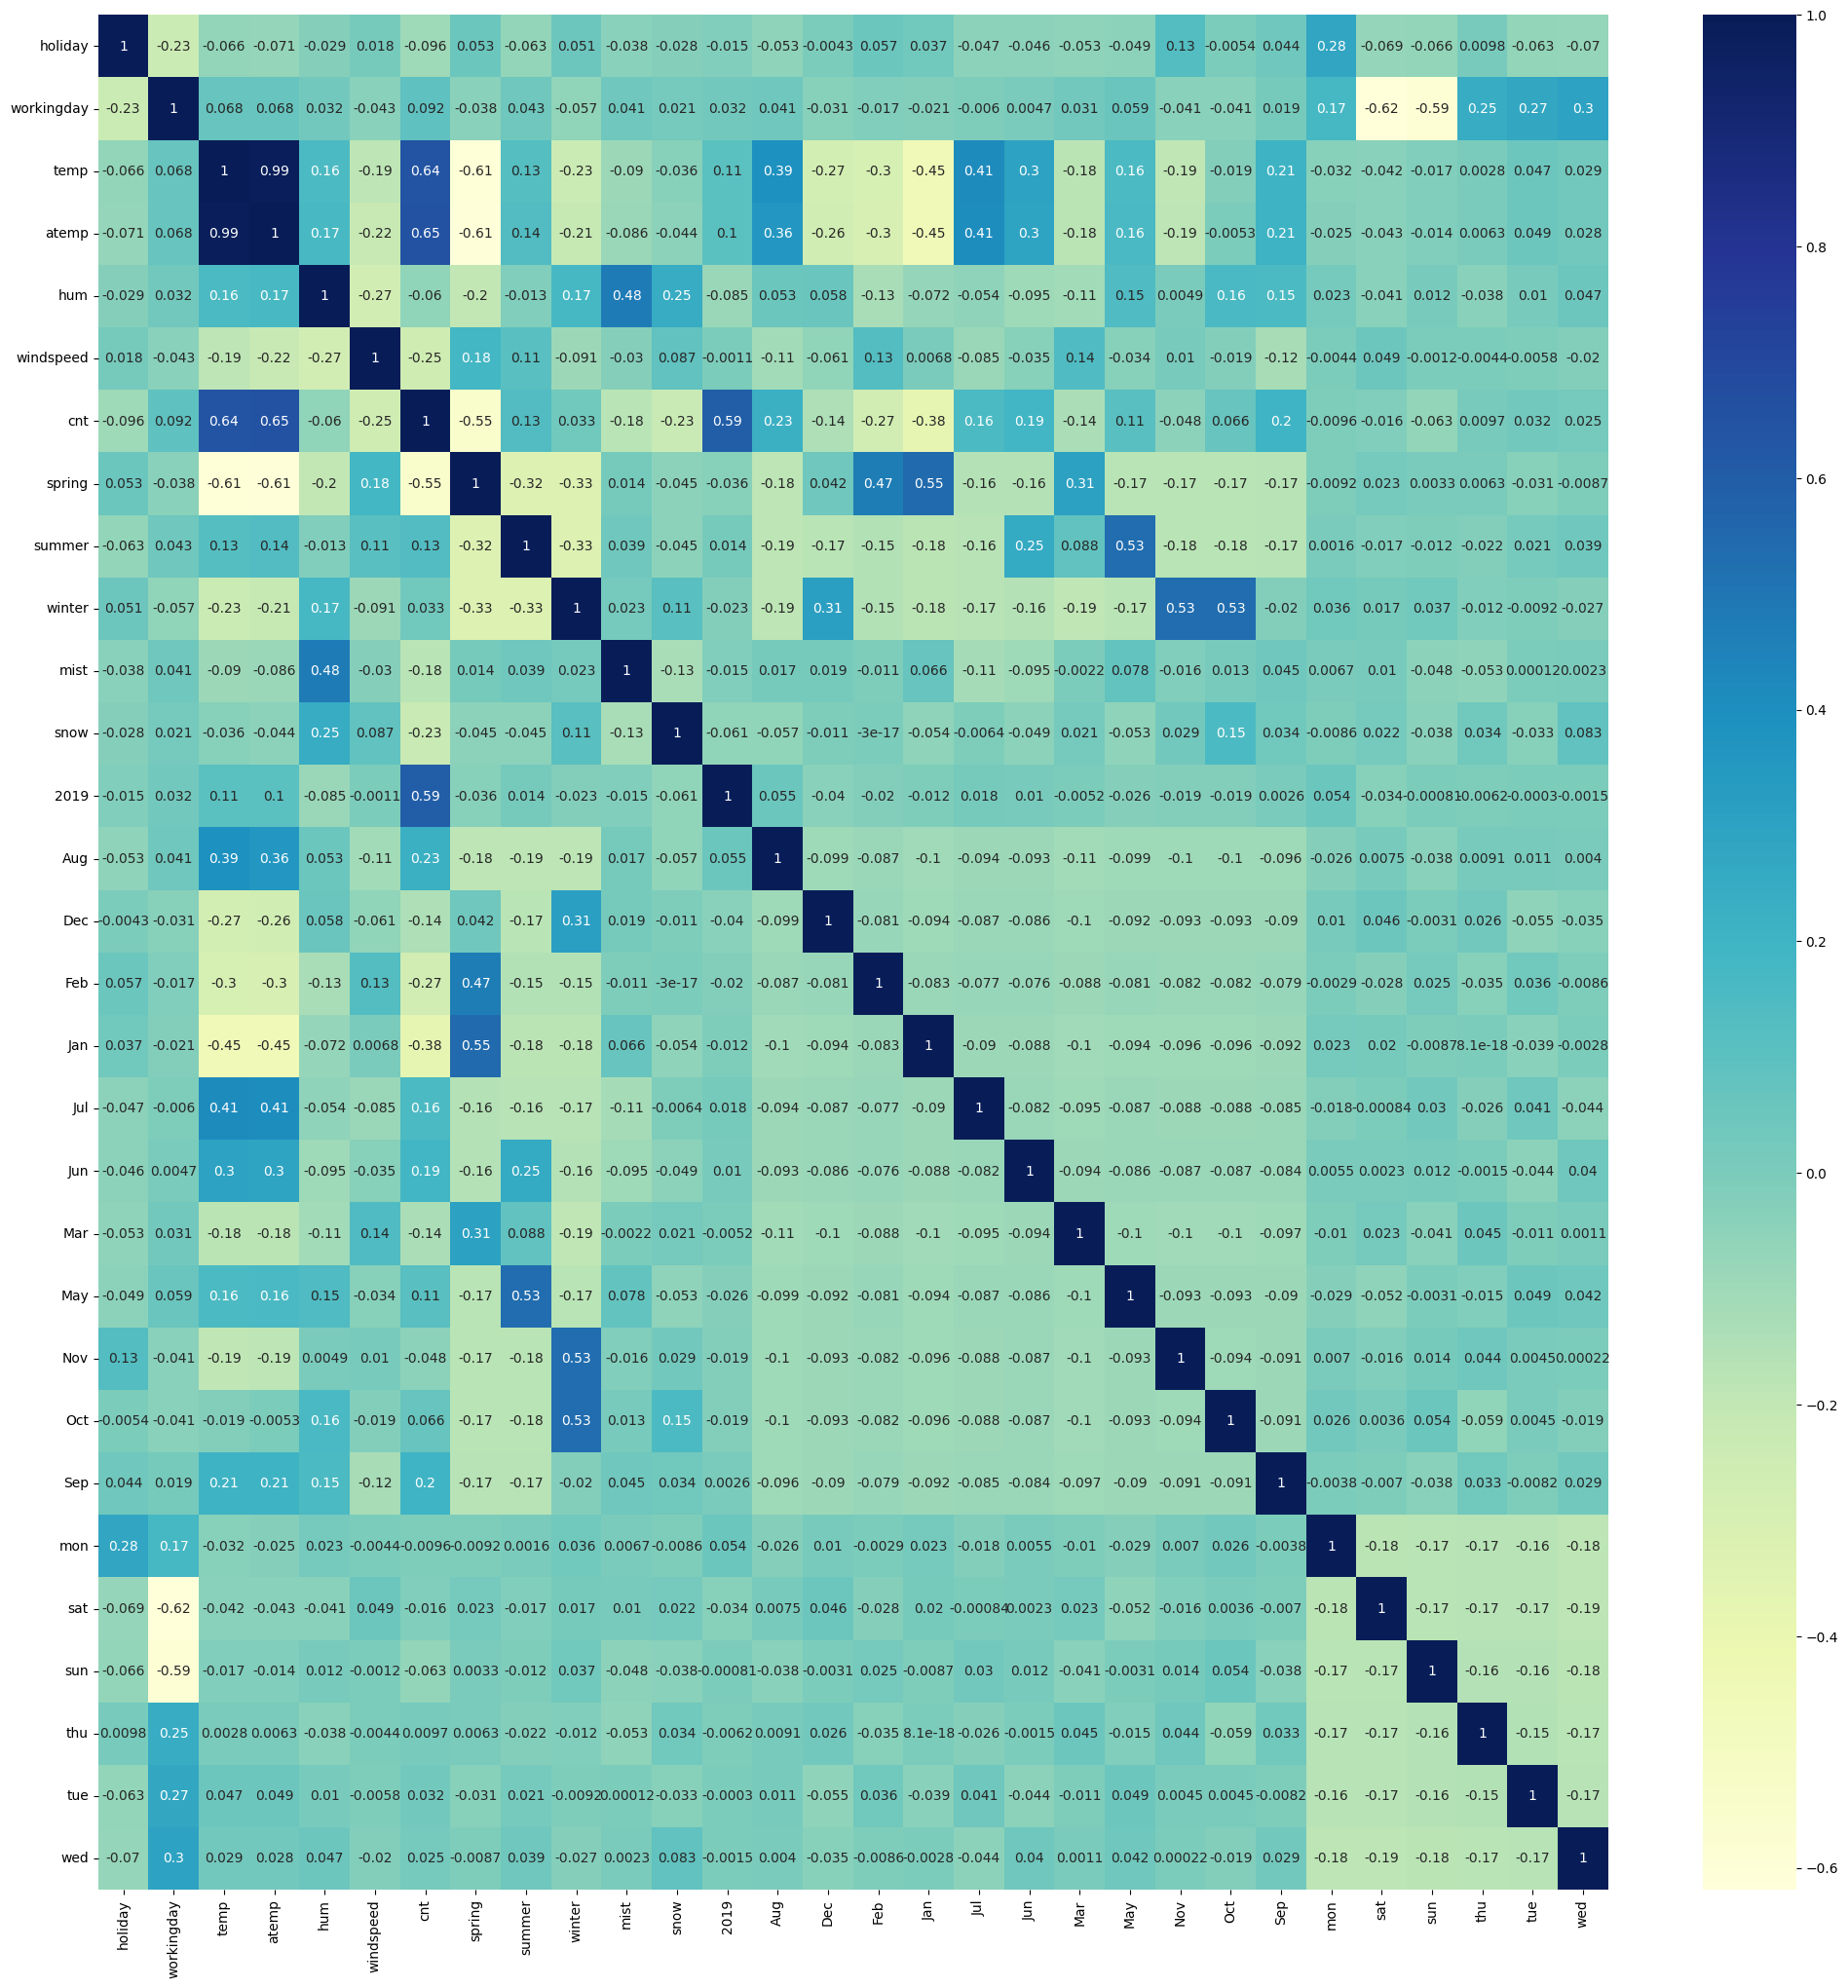

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model with 10 Features

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
print(X_train.shape)
print(y_train)


(510, 29)
653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64


In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('mist', False, 2),
 ('snow', True, 1),
 ('2019', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 19),
 ('Mar', False, 20),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('mon', False, 15),
 ('sat', False, 4),
 ('sun', False, 12),
 ('thu', False, 17),
 ('tue', False, 13),
 ('wed', False, 18)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'snow',
       '2019', 'Jul', 'Sep'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'mist', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.53e-184
Time:                        20:17:31   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.13
2,temp,2.87
5,spring,2.53
6,winter,1.75
9,Jul,1.29
3,hum,1.26
4,windspeed,1.15
7,snow,1.11
10,Sep,1.11
8,2019,1.03


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [52]:
y_train_cnt = lm.predict(X_train_rfe)

In [53]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

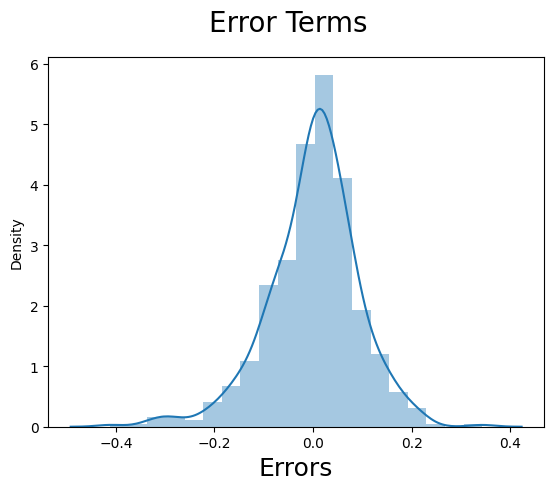

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### check the homeoscadacity 

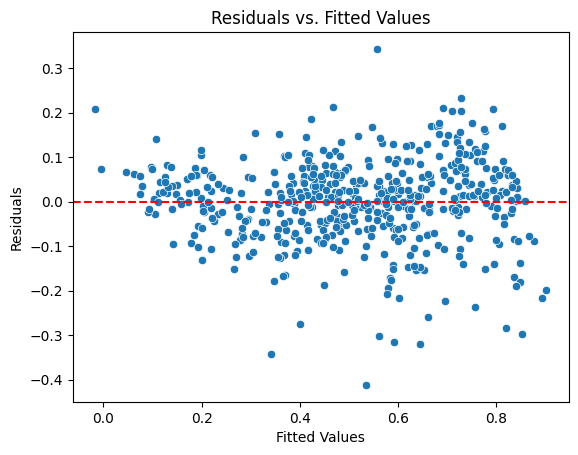

In [163]:
# Assuming 'model' is your fitted regression model
residuals = lm.resid
fitted_values = lm.fittedvalues

# Plotting
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [55]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# Now let's use our model to make predictions.
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [58]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

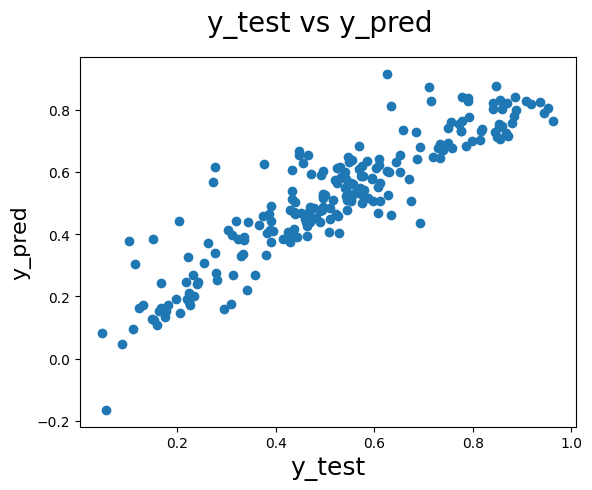

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)


print("Mean square error is ",mse)
print("R2 vaue is ",r_squared)

Mean square error is  0.008656048357387537
R2 vaue is  0.8177513196533346


## Building model-2  with 15 Features using RFE 

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [141]:
# Running RFE with the output number of the variable equal to 15
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [142]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'mist', 'snow', '2019', 'Jan', 'Jul', 'Sep', 'sat'],
      dtype='object')

In [143]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [144]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [145]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [146]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.31e-191
Time:                        21:53:06   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [147]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.92
2,workingday,1.88
15,sat,1.78
9,mist,1.57
12,Jan,1.57


## Build model-3 manually by removing the Spring Column.

In [149]:
# Running RFE with the output number of the variable equal to 15
lm2 = LinearRegression()




In [150]:
col = ['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'mist', 'snow', '2019', 'Jan', 'Jul', 'Sep', 'sat']

In [151]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [152]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [153]:
lm2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [154]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.24e-191
Time:                        21:54:23   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.717      0.0

In [155]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
3,temp,2.07
4,hum,1.90
2,workingday,1.88
14,sat,1.78
8,mist,1.56
11,Jan,1.55
7,winter,1.53
12,Jul,1.43
6,summer,1.41


### Residual analysis with model-2 

In [156]:
y_train_cnt = lm2.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

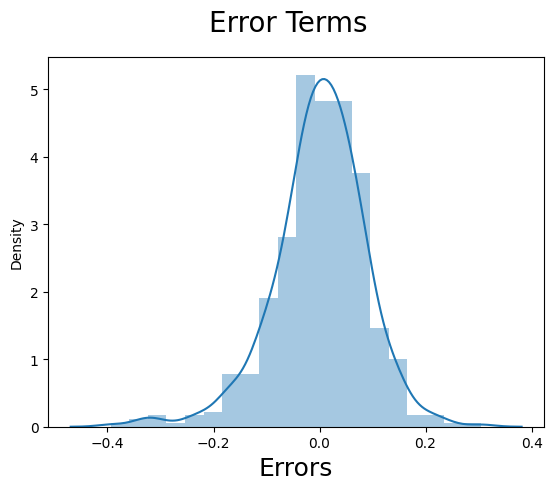

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)            

### Making Predictions with Model-3

In [159]:
# Now let's use our model to make predictions.
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [160]:
# Making predictions
y_pred = lm2.predict(X_test_new)

Text(0, 0.5, 'y_pred')

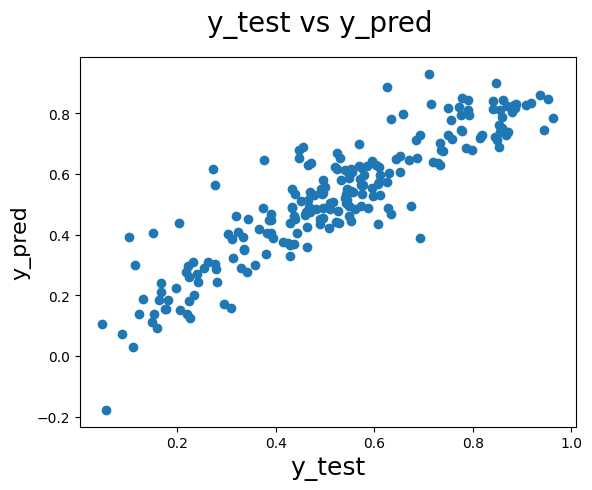

In [161]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Model-3 Evaluation 

In [162]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)


print("Mean square error is ",mse)
print("R2 vaue is ",r_squared)

Mean square error is  0.009281323197966176
R2 vaue is  0.8045864770086915


### Final Conclusion 
Model1 build with 10 features using RFE looks good. Because Test Set R-Squared values ie 81.7 matched Mode R-Squared value ie : 83.0 